# Ejercicios de repaso de Pandas

En este notebook vamos a repasar algunos conceptos de Pandas. Este notebook está vacío, pero viene acompanhado de otro notebook con todas las soluciones.

**Es extremadamente importante evitar consultar las soluciones hasta que no hayas terminado los ejercicios en este notebook**. Las soluciones pueden parecer sencillas cuando las ves, pero sacarlas por uno mismo puede ser mucho más difícil. **Por favor, solo consulta las soluciones si no puedes avanzar después de varios intentos**.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Datos

Los datos se encuentran en el directorio `data`. Se trata de un fichero CSV, usando comas como separador, y con los nombres de las columnas en la primera fila.

*Puedes intentar usar la shell antes para comprobar cómo es el fichero*.

**Ejercicio:** Usa la shell antes de cargar el CSV para comprobar cómo de grande es. **Es posible cargar todo el fichero en memoria?**

In [3]:
#file_path = '../../../data/weather_year.csv'
file_path = '/home/dsc/Downloads/weather_year.csv'


! ls -lah {file_path}

-rw-rw-r-- 1 dsc dsc 32K Jan 22 16:49 /home/dsc/Downloads/weather_year.csv


In [4]:
# En esta celda carga el fichero CSV en un data frame de pandas
# Usa el tabulador en iPython para autocompletar el nombre del fichero CSV dentro del directorio data
# Cambia el None de abajo por el c'odigo necesario

d = pd.read_csv(file_path)

## El dataframe

**Ejercicio**: Cuántas filas tiene el dataframe? Y cuántas columnas?

*Solución*: 366 filas y 23 columnas

In [5]:
NUMERO_FILAS = len(d)
NUMERO_COLUMNAS = len(d.columns)

print ("El data frame tiene %d filas y %d columnas" % (NUMERO_FILAS, NUMERO_COLUMNAS))

El data frame tiene 366 filas y 23 columnas


## Transformar los datos

Los datos de la columna EDT parecen ser fechas, pero sin embargo no se han leído como fechas al cargar el data frame.

**Ejercicio**: Comprueba de qué tipo son los datos incluidos en la columna EDT. **Vuelve a leer el dataframe (sobre-escribiendo la variable d) para que los datos sea lean como una fecha**.

In [6]:
d = pd.read_csv(file_path, parse_dates=['EDT'])

Para comprobar que los datos se han leído correctamente como una fecha, obtén el año, mes y semana (semana dentro del año, de 1 a 52) de la fecha que está en la cuarta fila en la columna EDT

*Solución*: 2012, 3 y 11

In [9]:
año = d.EDT[3].year
mes = d.EDT[3].month
semana = d.EDT[3].weekofyear  # maneja objetos de tiempo y es mas facil

print("Año: %d   Mes: %d   Semana: %d" % (año, mes, semana))

Año: 2012   Mes: 3   Semana: 11


## Renombrar columnas

Vamos a cambiar los nombres de todas las columnas para que sea más sencillo manejarlas

In [10]:
d.columns = ["date", "max_temp", "mean_temp", "min_temp", "max_dew",
                "mean_dew", "min_dew", "max_humidity", "mean_humidity",
                "min_humidity", "max_pressure", "mean_pressure",
                "min_pressure", "max_visibilty", "mean_visibility",
                "min_visibility", "max_wind", "mean_wind", "min_wind",
                "precipitation", "cloud_cover", "events", "wind_dir"]

## Propiedades de las columnas

Obtén la media, desviación estándar, mínimo y máximo, y los cuartiles de la columna mean_temp

Hay un método para dataframes y columnas de dataframes (series) que te permite obtener todos esos valores de una vez. **Puedes encontrar qué método es?**

*Solución*:
mean      55.683060
std       18.436506
min       11.000000
25%       41.000000
50%       59.000000
75%       70.750000
max       89.000000

In [11]:
d.mean_temp.describe()

count    366.000000
mean      55.683060
std       18.436506
min       11.000000
25%       41.000000
50%       59.000000
75%       70.750000
max       89.000000
Name: mean_temp, dtype: float64

Ahora vamos a dibujar la evolución de mean_temp.

Extrae la columna mean_temp e intenta usar el método plot sobre ella

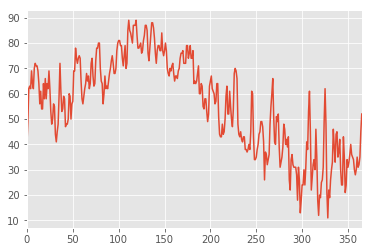

In [13]:
#d.mean_temp.plot()     No hacerlo nunca porque los podemos confundir con metodos
d['mean_temp'].plot()  

En el eje horizontal se incluye el 'indice de la serie, que en este caso es un n'umero autocorrelativo.

Vamos a sustituir el 'indice del dataframe por la columna date, de manera que ahora la fecha sea el 'indice, y por tanto se dibuje en el eje horizontal.

In [15]:
d.index = d['date']
d

,date,max_temp,mean_temp,min_temp,max_dew,mean_dew,min_dew,max_humidity,mean_humidity,min_humidity,...,max_visibilty,mean_visibility,min_visibility,max_wind,mean_wind,min_wind,precipitation,cloud_cover,events,wind_dir
date,,,,,,,,,,,,,,,,,,,,,
2012-03-10,2012-03-10,56,40,24,24,20,16,74,50,26,...,10,10,10,13,6,17.0,0.00,0,NaN,138
2012-03-11,2012-03-11,67,49,30,43,31,24,78,53,28,...,10,10,10,22,7,32.0,T,1,Rain,163
2012-03-12,2012-03-12,71,62,53,59,55,43,90,76,61,...,10,10,6,24,14,36.0,0.03,6,Rain,190
2012-03-13,2012-03-13,76,63,50,57,53,47,93,66,38,...,10,10,4,16,5,24.0,0.00,0,NaN,242
2012-03-14,2012-03-14,80,62,44,58,52,43,93,68,42,...,10,10,10,16,6,22.0,0.00,0,NaN,202
2012-03-15,2012-03-15,79,69,58,61,58,53,90,69,48,...,10,10,10,31,10,41.0,0.04,3,Rain-Thunderstorm,209
2012-03-16,2012-03-16,75,64,52,57,54,51,100,75,49,...,10,10,10,14,5,20.0,T,2,NaN,169
2012-03-17,2012-03-17,78,62,46,60,54,46,100,78,56,...,10,5,0,12,5,17.0,T,3,Fog-Thunderstorm,162
2012-03-18,2012-03-18,80,70,59,61,58,57,93,69,45,...,10,10,9,18,8,25.0,T,2,Rain,197


Comprueba que ahora al dibujar la columna mean_temp, en el eje horizontal vemos la fecha en vez del 'indice autocorrelativo

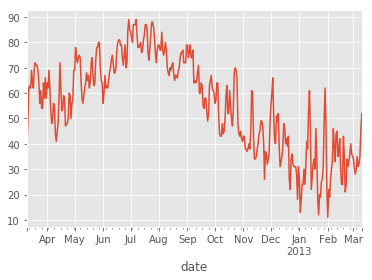

In [16]:
d['mean_temp'].plot()  # Nos pone tick grandes en los meses y pequeños las semanas

Sin embargo, ahora el dataframe tiene a la vez el índice y la columna date con los mismos valores. La columna date es redundante. **Podrías eliminarla?**

Ten cuidado, porque al eliminar una columna no actúas sobre el dataframe, sino que obtienes una copia del dataframe con la columna eliminada. No necesitamos el dataframe original, así que sobreescribe d con el nuevo dataframe sin la columna date.

In [17]:
d = d.drop('date',axis=1)

Al usar plot, obtenemos un gráfico de la serie temporal de la columna mean_temp. Vamos ahora a dibujar un histograma de esta columna, usando hist en vez de plot. **Intenta entender cuál es la diferencia entre ambos gráficos. Por qué ya no aparece la fecha en el gráfico? Qué valores se muestran en cada uno de los ejes?**

**En qué situaciones es útil un histograma?**

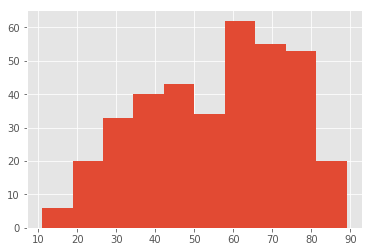

In [18]:
d['mean_temp'].hist()

Los valores de la temperatura estan en grados Farenheit, unas unidades que son difíciles de interpretar para la mayoría de nosotros.

Vamos a crear una columna mean_tempC que contenga los valores de mean_temp, pero transformados a grados centígrados, más fáciles de interpretar para nosotros. Para ello haremos uso de la función definida en la siguiente celda:

In [19]:
def f2c(f):
    c = (f-32)/1.8
    return c

In [ ]:
f2c_lambda = lambda f:(f - 32) / 1.8  # es igual que lo anetrior
(f2c, f2c_lambda)

Usa la función para crear la columna adicional con los valores en grados centígrados (grados Celsius), de nombre **mean_tempC**

In [21]:
d['mean_tempC'] = d['mean_temp'].apply(lambda x: f2c(x)) # no ejecua la funcion f, sino que le pasa la funcion (la aplica)

Dibuja ahora la serie temporal con esta nueva columna, usando plot. Incluye una rejilla (grid) en el gráfico para que sea más fácil de leer e interpretar

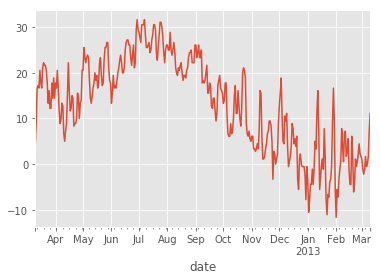

In [22]:
d['mean_tempC'].plot(grid = True)

Dibuja ahora también un histograma de esta nueva columna. **Cuál es el rango de temperaturas más frecuente en los datos?**

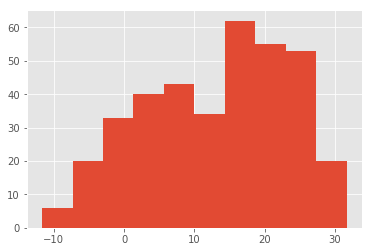

In [23]:
d['mean_tempC'].hist()

Como se puede ver en ambos gráficos, hay algunos días con temperaturas bajo 0.

**En qué día ocurrió la temperatura más baja? Cuál fue la temperature media ese día?**

**Cuántos días de temperaturas bajo cero hay en los datos?**

*Solución: El 1 de febrero de 2013 con -11.67 C, 44 d'ias

In [25]:
d['mean_tempC'].sort_values().head(1)

date
2013-02-01   -11.666667
Name: mean_tempC, dtype: float64

In [28]:
(d['mean_tempC'] < 0).value_counts()

False    322
True      44
Name: mean_tempC, dtype: int64

In [18]:
len(d.mean_tempC[d.mean_tempC<0])

44

In [19]:
d.mean_tempC[d.mean_tempC==min(d.mean_tempC)]

date
2013-02-01   -11.666667
Name: mean_tempC, dtype: float64

En el dataframe tenemos también las columnas min_temp y max_temp, que están también en grados Farenheit.

Crea dos columnas nuevas min_tempC y max_tempC, que contengan las temperaturas en grados centígrados. Recuerda que tienes la función f2c disponible.

In [29]:
d['min_tempC'] = d['min_temp'].apply(lambda x: f2c(x))

In [30]:
d['max_tempC'] = d['max_temp'].apply(lambda x: f2c(x))

Dibuja las series temporales de min_tempC, mean_tempC y max_tempC en una misma gráfica con tres curvas de diferentes columnas y leyenda. Añade una rejilla (grid) al gr'afico.

*Pista*: Si tienes un dataframe con la fecha en el índice y solo esas tres columnas, puedes usar el método plot del dataframe para obtener justo ese gráfico. Intenta extraer solo las tres columnas del dataframe d

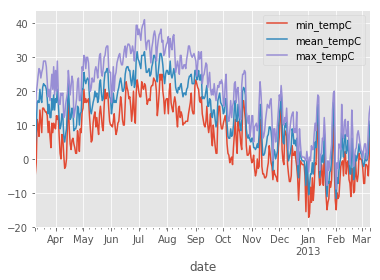

In [31]:
d[['min_tempC','mean_tempC','max_tempC']].plot(grid=True)  # es el dataFrame se pinta a si mismo y es lo mejor

La columna precipitation contiene la cantidad de lluvias diarias. Pero tenemos un problema, no todos los datos son numéricos. Obtén los primeros diez valores de la columna precipitation y comprueba si existe algún valor no numérico. **Que valor no numérico has encontrado?**

*Solución*: Hay valores que contienen T

In [32]:
d['precipitation'].head()

date
2012-03-10    0.00
2012-03-11       T
2012-03-12    0.03
2012-03-13    0.00
2012-03-14    0.00
Name: precipitation, dtype: object

Además, el resto de datos de la columna se han interpretado como texto. **Usa la siguiente función para crear una columna de nombre precipitationN que contendrá los valores numéricos**.

Lo que vamos a hacer es transformar en un número si encontramos un valor numérico, y en el caso de que encontremos T, el valor correspondiente será 0.00. El valor T significa que en ese día hubo trazas de lluvia. Es decir, llovió, pero muy poco, y no ha quedado registrado el volumen de precipitación.

In [35]:
def precToN(p):
    if p == 'T':
        return 0.0
    else:
        return double(p)

In [41]:
d['precipitationN'] = d['precipitation'].apply(lambda x: precToN(x))
d['precipitationN'] 

date
2012-03-10    0.00
2012-03-11    0.00
2012-03-12    0.03
2012-03-13    0.00
2012-03-14    0.00
2012-03-15    0.04
2012-03-16    0.00
2012-03-17    0.00
2012-03-18    0.00
2012-03-19    0.00
2012-03-20    0.00
2012-03-21    0.00
2012-03-22    0.14
2012-03-23    0.86
2012-03-24    0.06
2012-03-25    0.00
2012-03-26    0.00
2012-03-27    0.00
2012-03-28    0.00
2012-03-29    0.00
2012-03-30    0.01
2012-03-31    0.00
2012-04-01    0.51
2012-04-02    0.01
2012-04-03    0.00
2012-04-04    0.01
2012-04-05    0.69
2012-04-06    0.00
2012-04-07    0.00
2012-04-08    0.00
              ... 
2013-02-09    0.00
2013-02-10    0.27
2013-02-11    0.00
2013-02-12    0.00
2013-02-13    0.00
2013-02-14    0.00
2013-02-15    0.00
2013-02-16    0.00
2013-02-17    0.00
2013-02-18    0.39
2013-02-19    0.10
2013-02-20    0.00
2013-02-21    0.30
2013-02-22    0.03
2013-02-23    0.00
2013-02-24    0.00
2013-02-25    0.00
2013-02-26    1.17
2013-02-27    0.05
2013-02-28    0.01
2013-03-01    0.03
2013-03

Desde este momento, vamos a trabajar solo con las siguientes columnas:
* min_tempC
* mean_tempC
* max_tempC
* precipitationN

El índice del dataframe lo vamos a conservar también, para tener las fechas para dibujar diversos gráficos.

**Crea un dataframe de nombre w que contenga solo esas columnas, pero que conserve el índice de d**

In [43]:
w = d[['min_tempC','mean_tempC','max_tempC','precipitationN']]
w

,min_tempC,mean_tempC,max_tempC,precipitationN
date,,,,
2012-03-10,-4.444444,4.444444,13.333333,0.00
2012-03-11,-1.111111,9.444444,19.444444,0.00
2012-03-12,11.666667,16.666667,21.666667,0.03
2012-03-13,10.000000,17.222222,24.444444,0.00
2012-03-14,6.666667,16.666667,26.666667,0.00
2012-03-15,14.444444,20.555556,26.111111,0.04
2012-03-16,11.111111,17.777778,23.888889,0.00
2012-03-17,7.777778,16.666667,25.555556,0.00
2012-03-18,15.000000,21.111111,26.666667,0.00


A modo de ejemplo, vemos cómo realizar una nube de puntos relacionando precipitación con la temperatura media.

Existen muchos gráficos que se pueden hacer directamente con Pandas y sus Series y Dataframes. Para más información, consulta la documentación en http://pandas.pydata.org/pandas-docs/stable/visualization.html

**Llovió algún día en los que la temperatura media era menor que 0?**

*Solución*: Sí, algunos puntos con temperaturas negativas tienen precipitaciones positivas.

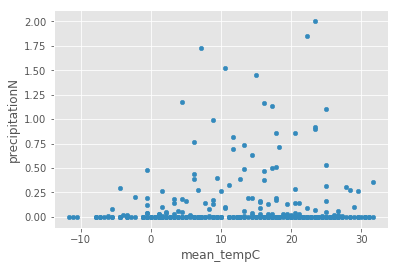

In [44]:
w.plot(kind='scatter',x='mean_tempC',y='precipitationN',grid=True)